In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("C:/Users/piyus/Data_Science/Projects/Heart_Attack_Prediction/heart.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
input_cols = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']
output = ['output']


In [6]:
X_data = data[input_cols]
Y_data = data[output]

In [7]:
X_data.shape , Y_data.shape

((303, 13), (303, 1))

In [8]:
def entropy(col):
    favour = np.unique(col,return_counts = True)
    N = col.shape[0]
    ent = 0
    for i in favour[1]:
        prob = i/N
        ent += -1*(prob * np.log2(prob))
    return ent

In [9]:
def split_data(X_data,feat,value):
    X_right = pd.DataFrame([] , columns=X_data.columns)
    X_left = pd.DataFrame([] , columns=X_data.columns)
    
    for i in range(X_data.shape[0]):
        val = X_data[feat].loc[i]  #locates ith point
        
        if val >= value:
            X_right = pd.concat([X_right,X_data.iloc[i:i+1]])
        else:
            X_left = pd.concat([X_left,X_data.iloc[i:i+1]])
    return X_left , X_right

In [10]:
left , right = split_data(data[:10] ,'chol',220)

In [11]:
left

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [12]:
right

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [13]:
def info_gain(X_data,feat,value):
    left , right = split_data(X_data , feat , value)
    
    prob_l = left.shape[0]/X_data.shape[0]
    prob_r = right.shape[0]/X_data.shape[0]
    
    i_gain = entropy(X_data.output) - (prob_l*entropy(left.output) + prob_r*entropy(right.output))
    
    return i_gain


In [14]:
for i in X_data.columns:
    print(i , info_gain(data,i,data[i].mean()))

age 0.06016652346703877
sex 0.05913830859322644
cp 0.20125248993687073
trtbps 0.006102049093656747
chol 0.015695491946608575
fbs 0.0005658824294302311
restecg 0.01848591976374636
thalachh 0.1098672282444546
exng 0.14221049399658625
oldpeak 0.09013349769475876
slp 0.11569238750992161
caa 0.16174294419259028
thall 0.17704078036258974


In [15]:
class Decision_Trees:
    def __init__(self , depth = 0 , max_depth = 7):
        self.left = None
        self.right = None
        self.feat = None
        self.value = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,train_X):
        features = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']
        i_gain = []
        
        for i in features:
            i_gain.append(info_gain(train_X,i,train_X[i].mean()))
            
        self.feat = features[np.argmax(i_gain)]
        self.value = train_X[self.feat].mean()
        
        left , right = split_data(train_X , self.feat , self.value)
        left = left.reset_index(drop = True)
        right = right.reset_index(drop = True)
        print("Making Tree with node : ", self.feat , ", Depth : " , self.depth)
        
        if left.shape[0] == 0 or right.shape[0] == 0:
            if train_X.output.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Not Survived'
            return 'Done Training'
        
        if self.depth >= self.max_depth:
            if train_X.output.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Not Survived'
            return 'Done Training'
        
        self.left = Decision_Trees(depth = self.depth+1)
        self.left.train(left)
        
        self.right = Decision_Trees(depth = self.depth+1)
        self.right.train(right)
        
        if train_X.output.mean() >= 0.5:
            self.target = 'Survived'
        else:
            self.target = 'Not Survived'
        return 'Done Training'        
        
    def predict(self,test_point):
        if test_point[self.feat] >= self.value:
            if self.right is None:
                return self.target
            return self.right.predict(test_point)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test_point)

In [16]:
split = 0.8

train_X = data[:int(split*data.shape[0])]
test_X = data[int(split*data.shape[0]):]

In [17]:
print(train_X.shape , test_X.shape)

(242, 14) (61, 14)


In [18]:
dt = Decision_Trees(max_depth = 7)
dt.train(train_X)

Making Tree with node :  thall , Depth :  0
Making Tree with node :  caa , Depth :  1
Making Tree with node :  thalachh , Depth :  2
Making Tree with node :  thalachh , Depth :  3
Making Tree with node :  age , Depth :  4
Making Tree with node :  age , Depth :  5
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  5
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  7
Making Tree with node :  restecg , Depth :  4
Making Tree with node :  oldpeak , Depth :  5
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree wi

Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  7
Making Tree with node :  restecg , Depth :  3
Making Tree with node :  thalachh , Depth :  4
Making Tree with node :  age , Depth :  5
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  5
Making Tree with node :  age , Depth :  4
Making Tree with node :  age , Depth :  5
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  5
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  7
Making Tree with node :  age , Depth :  6
Making Tree with node :  age , Depth :  7
Making Tree with node :  

'Done Training'

In [19]:
test_X = test_X.reset_index(drop=True)
pred = []

for i in range(test_X.shape[0]):
    output = dt.predict(test_X.loc[i])
    if output == 'Survived':
        pred.append(1)
    else:
        pred.append(0)
        

In [20]:
corr = 0
for i in range(test_X.shape[0]):
    if pred[i] == test_X.output[i]:
        corr += 1
print(corr/test_X.shape[0])

0.5409836065573771


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
d_tree = DecisionTreeClassifier(criterion='entropy' , max_depth = 10)

In [23]:
d_tree.fit(X_data , Y_data)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [24]:
d_tree.score(test_X[input_cols] , test_X.output)

1.0

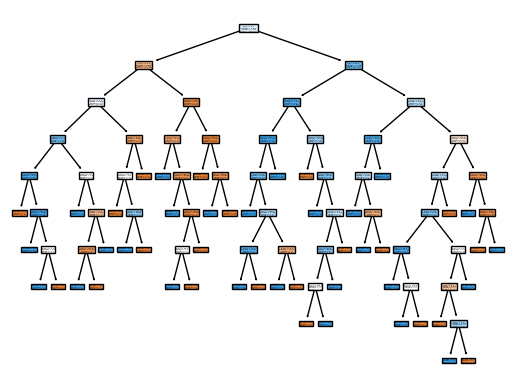

In [25]:
sklearn.tree.plot_tree(d_tree,filled=True)
plt.show()

In [26]:
figure,_ = plt.subplots(ncols = 1 , nrows = 1 , figsize = (100,100))
sklearn.tree.plot_tree(d_tree, filled = True)
plt.show
figure.savefig('tree.png')